# Proyecto de Machine Learning 


## Clasificación multiclase



### 1. Importamos librerias

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

### 2. Conjunto de datos

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
print(data)
print(data.describe())
print(data.groupby("species").size())

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.05

### 3.  Visualización de datos

Con la idea básica de los datos, necesitamos extender algunas visualizaciones, por lo que lo que vamos a ver dos tipos de visualizaciones de datos:
- Graficos univariados para comprender mejor cada atributo
- Graficos multivariados para compder mejor las relaciones entre atributos.

#### 3.1 Gráficos Univariados:

<Axes: ylabel='petal_width'>

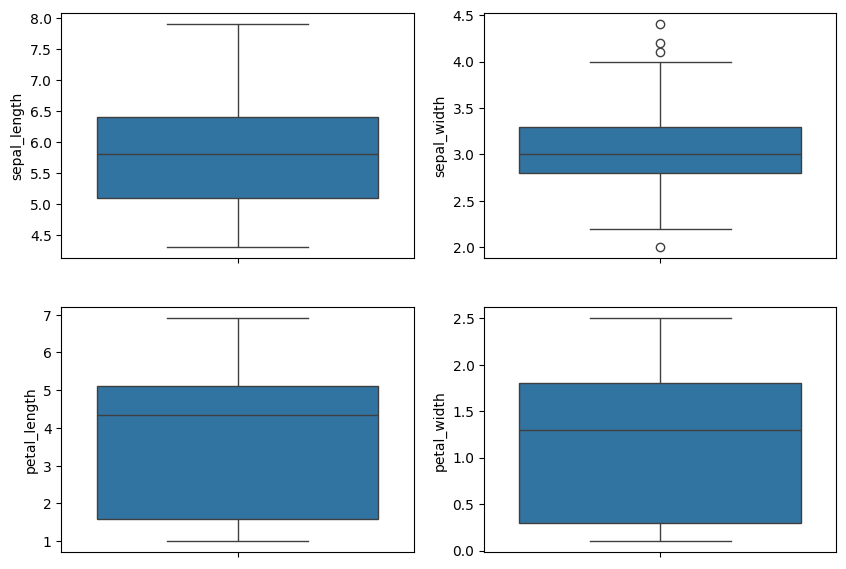

In [4]:
f, axes = plt.subplots(2, 2, figsize=(10,7))
sns.boxplot(data["sepal_length"], ax=axes[0,0], label = "sepal_length")
sns.boxplot(data["sepal_width"], ax=axes[0,1], label = "sepal_width")
sns.boxplot(data["petal_length"], ax=axes[1,0], label = "petal_length")
sns.boxplot(data["petal_width"], ax=axes[1,1], label = "petal_width")


<Axes: xlabel='petal_width', ylabel='Density'>

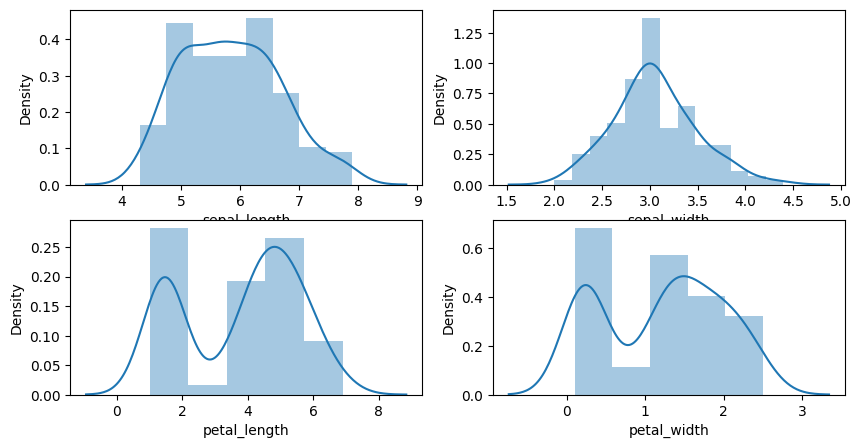

In [5]:
f, axes = plt.subplots(2, 2, figsize=(10, 5))
sns.distplot(data["sepal_length"], ax=axes[0,0])
sns.distplot(data["sepal_width"], ax=axes[0,1])
sns.distplot(data["petal_length"], ax=axes[1,0])
sns.distplot(data["petal_width"], ax=axes[1,1])

#### 3.2 Gráficos multivariados

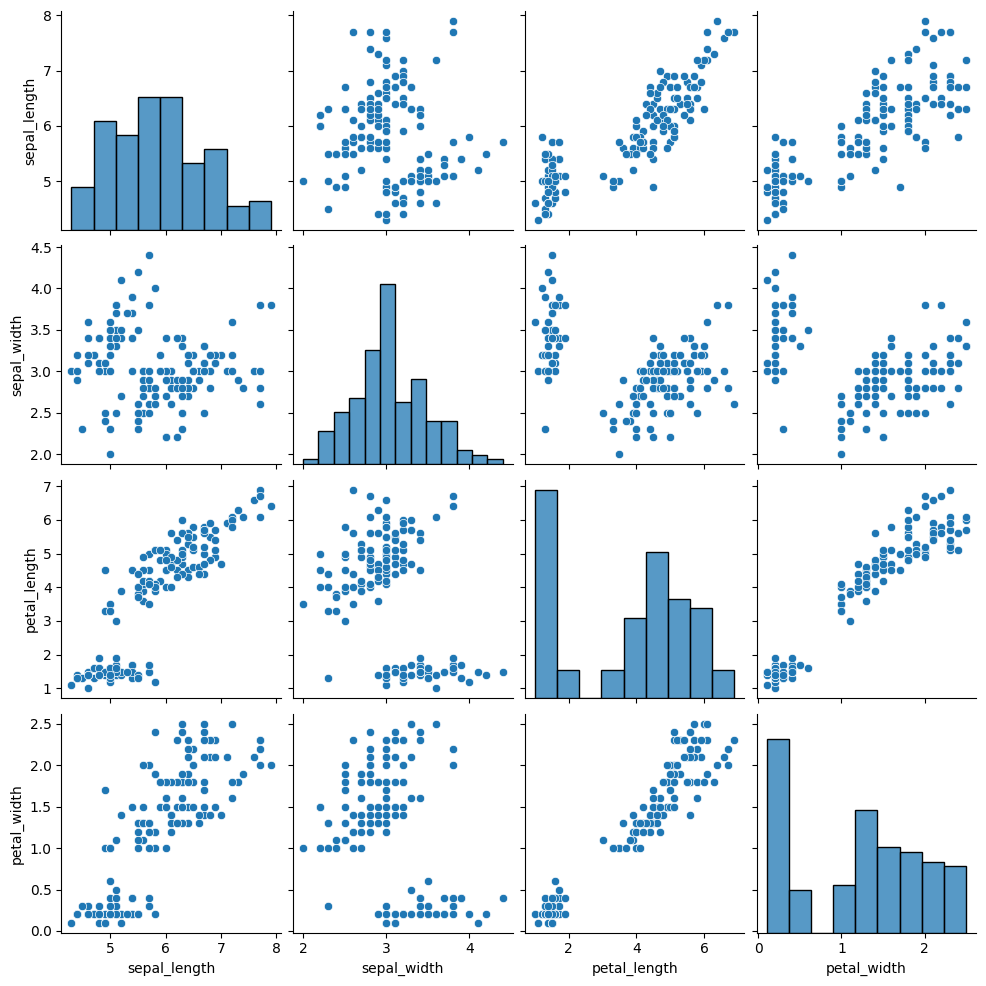

In [6]:
# Dispersión
sns.pairplot(data)

### 4. Face de modelado
Con esto se genera algunos modelos de datos y estimar su Acurrancy en datos no etiquetados.
- Crear conjunto de validación 
- Configurar validación cruzada
- Construir 5 modelos diferentes y evaluar el rendimiento de cada uno de ellos
- seleccionar al mejor modelo

### 4.1 Crear un conjunto de validación 

Ahora los datos de entrenamiento X_train e Y_train para preparar modelos y conjuntos de x_validation e y_validation que podemos usar más adelante 



In [7]:
array = data.values
X = array[:,0:4]
Y = array [:,4]
validation_size = 0.2
seed = 7
X_train, x_validation, Y_train, y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


#### 4.2 Validación de modelos

In [20]:
models = []
models.append(("LoR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("K-NN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVC", SVC()))

results = []
names = []
seed = 3

for name, model in models:
    Kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=Kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {(cv_results.mean() * 100):.2f}% ({(cv_results.std()*100):.2f}%)")


LoR: 98.33% (3.33%)
LDA: 97.50% (3.82%)
K-NN: 98.33% (3.33%)
CART: 98.33% (3.33%)
NB: 97.50% (5.34%)
SVC: 98.33% (3.33%)


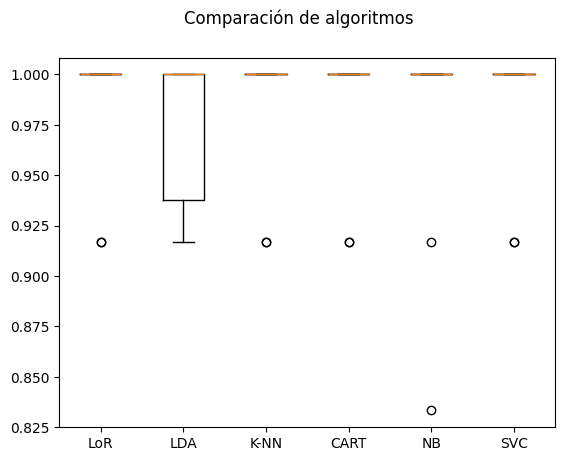

In [21]:
fig = plt.figure()
fig.suptitle("Comparación de algoritmos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 5. Fase de Forecasting

Se selecciona el algoritmo k-NN como el modelo más preciso, despues queremos tener una idea del Accurracy del modelo en nuestro conjunto de validacón que nos dara una verificación independiente sobre el Accuracy del mejor del mejor modelo

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
prediction = knn.predict(x_validation)
print(accuracy_score(y_validation, prediction))
print(confusion_matrix(y_validation, prediction))
print(classification_report(y_validation, prediction))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

